In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10
import pandas as pd
from scipy import stats

In [24]:
glia_hpc_set_file = "glia_hpc_sex_0_specific_binary_amyloid_down_full_brain_background_Great_GO.txt"
glia_dlpfc_set_file = "glia_dlpfc_binary_amyloid_up_full_brain_background_Great_GO.txt"
other_amy_assoc_set_file = "amyloid_associated_peaks_without_two_big_sets_full_brain_background_Great_GO.txt"

all_peaks_file = "all_amyloid_associated_peaks_full_brain_background_Great_GO.txt"

neuron_specific_file = "allbr_cell_type_effect_for_neuron_up_full_brain_bg_Great_GO.txt"
microglia_specific_file = "allbr_cell_type_effect_for_microglia_up_full_brain_bg_Great_GO.txt"
glia_specific_file = "allbr_cell_type_effect_for_glia_up_full_brain_bg_Great_GO.txt"

In [25]:
fileSuffixesList = [glia_hpc_set_file, glia_dlpfc_set_file, other_amy_assoc_set_file, all_peaks_file, neuron_specific_file, microglia_specific_file, glia_specific_file]
prefix = "/great_analysis/"
filesList = [prefix+suffix for suffix in fileSuffixesList]
colorList = ["#ff8c00ff", "#990033ff", "#154360ff", 'black',"#ff9966ff","#006699ff","#009966ff"]
labelsList = ["Glia Female Hip. Hypoacetylated", "Glia dlPFC Hyperacetylated", "Other amyloid associated", "All amyloid associated","Neuron", "Microglia", "Oligo"]

In [26]:
pathways_file = "pathways_to_plot.txt"

In [27]:
pathwayNames = dict()
with open(pathways_file, 'r') as f:
    for line in f:
        data = line.strip().split("\t")
        pid = data[1]
        pname = data[0]
        pathwayNames[pid] = pname

In [28]:
pathwayFoldChanges = dict()
pathwayFDRValues = dict()
for pid in pathwayNames:
    pathwayFoldChanges[pid] = [0 for i in range(len(filesList))]
    pathwayFDRValues[pid] = [0 for i in range(len(filesList))]

In [29]:
pathwayFgRegionHits = dict()
pathwayFgGeneHits = dict()
for pid in pathwayNames:
    pathwayFgRegionHits[pid] = [0 for i in range(len(filesList))]
    pathwayFgGeneHits[pid] = [0 for i in range(len(filesList))]

In [30]:
for i,filename in enumerate(filesList):
    with open(filename, 'r') as f:
        for line in f:
            if not line.startswith("#"):
                data = line.strip().split("\t")
                pid = data[1]
                foldEnrich = np.log2(float(data[7]))
                negLogFdr = -np.log10(float(data[6]))
                fgRegionHits = int(data[9])
                fgGeneHits = int(data[13])
                if pid in pathwayFoldChanges:
                    pathwayFoldChanges[pid][i] = foldEnrich
                    pathwayFDRValues[pid][i] = negLogFdr
                    pathwayFgRegionHits[pid][i] = fgRegionHits
                    pathwayFgGeneHits[pid][i] = fgGeneHits

/home/eramamur/bin/miniconda3/envs/data_analysis/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


In [35]:
foldChangeData = []
for pid in pathwayFoldChanges:
    foldChangeData.append(pathwayFoldChanges[pid])
    
foldChangeData = np.array(foldChangeData)
foldChangeDataNormed = foldChangeData

In [36]:
fdrData = []
fdrStrings = []
for pid in pathwayFDRValues:
    fdrData.append(pathwayFDRValues[pid])
    pidFdrStrings = []
    for val in pathwayFDRValues[pid]:
        fdr_string = ""
        if val > -np.log10(0.05):
            fdr_string = "*"
        if val > -np.log10(0.01):
            fdr_string = "**"        
        pidFdrStrings.append(fdr_string)
    fdrStrings.append(pidFdrStrings)
    
fdrData = np.array(fdrData)

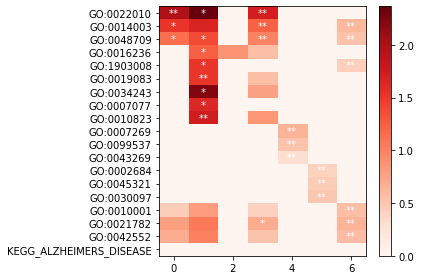

In [42]:
fig, ax = plt.subplots()
im=ax.imshow(foldChangeDataNormed, aspect="auto", cmap="Reds")
ax.set_yticks(ticks = np.arange(len(pathwayFoldChanges)))
ax.set_yticklabels([pid for pid in pathwayFoldChanges])
for i in range(len(fdrStrings)):
    for j in range(len(fdrStrings[i])):
        text = ax.text(j, i, fdrStrings[i][j],
                       ha="center", va="center", color="white")
cbar = ax.figure.colorbar(im,ax=ax)
plt.savefig("go_terms.svg")